In [7]:
#!pip install .
import matplotlib.pyplot as plt
import cv2
import numpy as np
import ffmpeg
ffmpeg.__path__

['c:\\Users\\bbbbb\\anaconda3\\lib\\site-packages\\ffmpeg']

In [8]:
from smart.processor import ImageProcessor, VideoProcessor
from smart.video import Video

In [4]:
processor = VideoProcessor()
processor

In [5]:
# Test generate video from frames
processor.generate_video_from_frames('img/djo_service', 'video_output/djo_service.mp4', fps=25)

In [4]:
vid = Video.read_video("dataset/service_j2/cut3_Y6e58fWo.mp4")
print("The video has {} frames".format(len(vid.frames)))

The video has 76 frames


In [5]:
vid.save_all_frames('img/djo_service')

In [6]:
frames_vid = vid.frames
frames_vid.shape

(125, 1080, 1920, 3)

In [9]:
image_processor = ImageProcessor()
image_processor

In [19]:
# Test crop image
crop_img = image_processor.crop_image('img/frame0.jpg', 998, 1112, 620, 866)

In [20]:
image_processor.save_img(crop_img, 'img/frame0-crop-test.jpg')

In [23]:
# Color to black and white image
no_color_img = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)
no_color_img.shape

(246, 114)

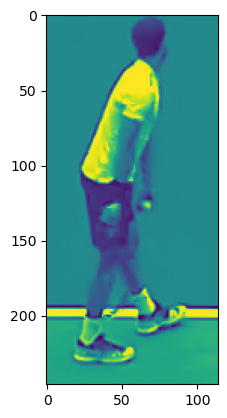

In [24]:
plt.imshow(no_color_img)

In [25]:
# Test remove background
no_bg_img = image_processor.remove_background('img/frame0-crop-no-color.jpg')

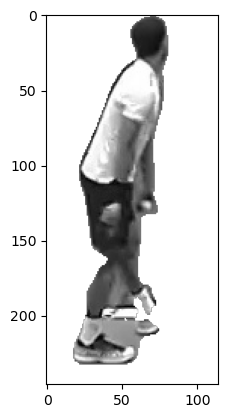

In [26]:
plt.imshow(no_bg_img)

In [13]:
def save_video(frame, saving_file_name, fps=30):
    i_height, i_width, _ = frame.shape
    process = (
        ffmpeg
        .input('pipe:', format='rawvideo', pix_fmt='rgb24', s='{}x{}'.format(i_width, i_height))
        .output(saving_file_name, pix_fmt='yuv420p', vcodec='libx264', r=fps)
        .overwrite_output()
        .run_async(pipe_stdin=True)
    )

    return process


In [14]:
saved_video_file_name = 'video_output/video_output4.mp4'
cap = cv2.VideoCapture()
process = save_video(frames_vid[0], saved_video_file_name)

for i, frame in enumerate(frames_vid):
    process.stdin.write(
    cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            .astype(np.uint8)
            .tobytes()
            )
    
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
    # else:
    #     process.stdin.close()
    #     process.wait()
    #     cap.release()
    #     break

process.stdin.close()
process.wait()
cap.release()

In [6]:
new_vid = Video.read_video("video_output/djo_service.mp4")
print("The video has {} frames".format(len(new_vid.frames)))

The video has 76 frames
